# Image Filtering

The main objectives of this module are:

* Implement point filtering with look-up tables.
* Implement region filtering with kernel convolution, morphological operations and edge detection.
* Understand spatial frequency information with the Fourier transform.

## 1. Look-up tables

Look-up tables are a very useful tool to perform simple pixel-level filtering of an image.

Numpy arrays indexing ([see reference here](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)) is a very powerful tool, but can be a bit counter-intuitive at first. We will use it to quickly create and use look-up tables to transform an image.

Look at the short example below :

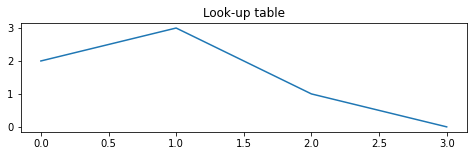

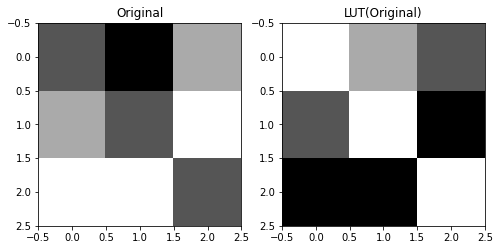

In [34]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Let's create a 3x3 "image" with 4 possible pixel values (in [0,3])
im = np.array([[1,0,2],[2,1,3],[3,3,1]])

# look-up table is a vector of size 4 mapping the new value for the pixels of m
lut = np.array([2,3,1,0]) # maps 0 -> 2, 1 -> 3, 2 -> 1, 3 -> 0

plt.figure(figsize=(8,2))
plt.plot(lut)
plt.title('Look-up table')
plt.show()

# we can use numpy vector indexing to apply the look-up table:
new_im = lut[im] # This will create a new array with the same size as m

plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #supblot is useful to display images side-by-side
plt.imshow(im, cmap=cm.gray)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(new_im, cmap=cm.gray)
plt.title('LUT(Original)')
plt.show()

This example illustrate how to map all the value present in an array $m$ onto the new values given by a look-up table $lut$ which is a simple 1D vector.

**Starting from this example, create the following LUTs** and apply them to the "walking.jpg" image:
1. For inverting an image (so that $0 \rightarrow 255$, $255 \rightarrow 0$)
1. To keep only graylevel such that $g \ge t$, setting all other values to 0.
1. To reduce the number of gray levels from 256 to 8 (so that $255 \rightarrow 7$, $0 \rightarrow 0$).
1. To "stretch" the histogram so that, given a **minimum value** $T_{min}$ and a **maximum value** $T_{max}$, we have :
    * If $I(x,y) < T_{min}$, the new value is set to 0
    * If $I(x,y) > T_{max}$, the new value is set to 255
    * Values between $T_{min}$ and $T_{max}$ are stretched to cover the entire histogram.
1. to perform an **equalization** of the cameraman image (so that the histogram becomes "as flat as possible")

(799, 640) uint8


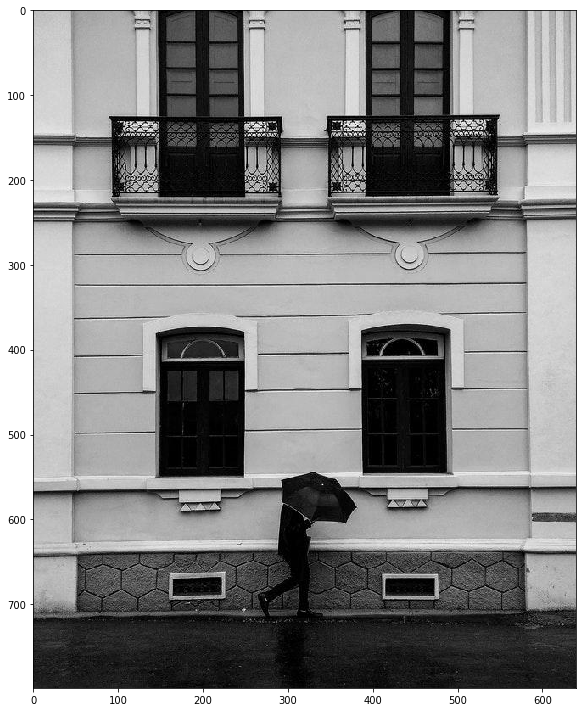

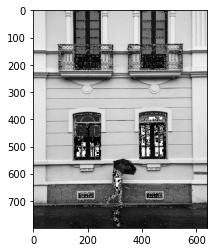

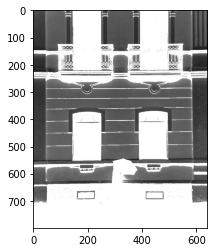

[[5 5 5 ... 6 6 6]
 [5 5 5 ... 6 6 5]
 [5 5 5 ... 6 6 5]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


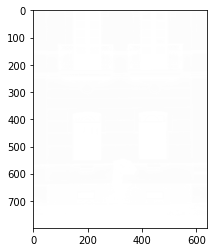

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   1   3   5   7   9  11  13  15  17  18  20
  22  24  26  28  30  32  34  35  37  39  41  43  45  47  49  51  52  54
  56  58  60  62  64  66  68  69  71  73  75  77  79  81  83  85  86  88
  90  92  94  96  98 100 102 103 105 107 109 111 113 115 117 119 120 122
 124 126 128 130 132 134 136 137 139 141 143 145 147 149 151 153 154 156
 158 160 162 164 166 168 170 171 173 175 177 179 181 183 185 187 188 190
 192 194 196 198 200 202 204 205 207 209 211 213 215 217 219 221 222 224
 226 228 230 232 234 236 238 239 241 243 245 247 249 251 253 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

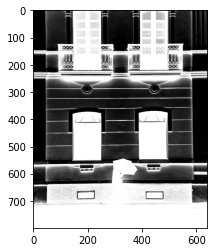

In [35]:
from skimage.io import imread,imshow,imsave

im = imread('walking.jpg')
print(im.shape, im.dtype)
plt.figure(figsize=(10,10))
imshow(im)
plt.show()

## -- Your code here -- ##
# inverted
inverted = np.asarray([x for x in range(256, 0, -1)], dtype=np.uint8)
new_im = inverted[im]
plt.imshow(new_im, cmap='Greys', vmin=0, vmax=255)
plt.show()

# g > t
t = 128 # can change
part_1 = [0 for x in range(t)]
part_2 = [x for x in range(t, 256)]
lut = np.asarray(part_1 + part_2, dtype=np.uint8)
new_im = lut[im]
plt.imshow(new_im, cmap='Greys', vmin=0, vmax=255)
plt.show()

lut = np.linspace(0, 8, 256, dtype=np.uint8)
new_im = lut[im]
print(new_im)
plt.imshow(new_im, cmap='Greys', vmin=0, vmax=255)
plt.show()

t_min = 60
t_max = 195
part_1 = [ 0 for x in range(t_min) ]
part_2 = list(np.linspace(0, 255, t_max - t_min + 1))
part_3 = [ 255 for x in range(t_max + 1, 256) ]
lut = np.asarray(part_1 + part_2 + part_3, dtype=np.uint8)
print(lut)
new_im = lut[im]
plt.imshow(new_im, cmap='Greys', vmin=0, vmax=255)
plt.show()


## 2. Kernel convolution

Kernal convolution allows us to filter an image based on the values of a neighborhood.

Write a program that applies a 3x3 kernel convolution on an image. Use it on the "walking" image to perform a mean filter.

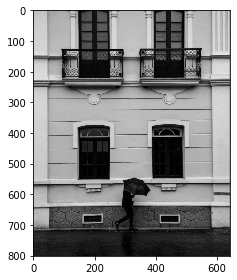

In [36]:
from scipy.signal import convolve2d
## -- Your code here -- ##
kernel = [[0.0, 0.5, 0.0], [0.5, 1.0, 0.5], [0.0, 0.5, 0.0]]
kernel = np.asarray(kernel, dtype=np.float32)
kernel /= 3.0

res = convolve2d(im, kernel).astype(np.uint8)
imshow(res)
plt.show()



Using the [median filter](https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.median) and the [mean filter](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) from scikit-image, compare the behaviour of the two filters with neighborhood of increasing sizes on the "noisy" astronaut image:

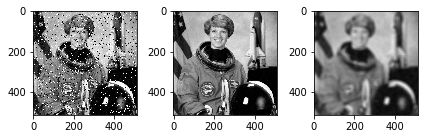

In [37]:
from skimage.filters.rank import mean, median
from skimage.morphology import disk

im = imread('astronaut_noisy.jpg')
blurred_med = median(im)
blurred_mean = mean(im, disk(10))

plt.subplot(131)
imshow(im)
plt.subplot(132)
imshow(blurred_med)
plt.subplot(133)
imshow(blurred_mean)
plt.show()


## 3. 2D Fourier transform

The 2D Fourier transform allows us to get a representation of the spatial frequencies present in an image. A very powerful way of filtering images is to modify those frequencies directly by modifying the "Fourier image", and to use the inverse transform to get the pixel values of the filtered image.

Let's illustrate that with a fake example. We start with a completely random signal and compute the Fourier transform. Note that the Fourier image is complex, so we use its amplitude. As the range of amplitudes is so high that we don't see much in the resulting image, we display the log of the amplitude.

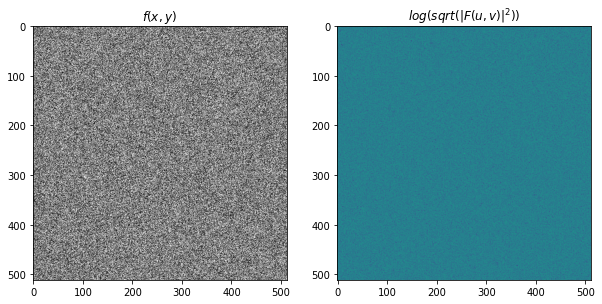

In [38]:
from numpy.fft import fft2,ifft2,fftshift,ifftshift
# fft2 -> Fourier transform
# ifft2 -> Inverse transform
# fftshift & ifftshift -> reorganize the "Fourier image" to make it more easily interpretable.

im = np.random.random((512,512))
f = fftshift(fft2(im))
amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

We could now, for instance, decide to add an horizontal frequency by creating peaks in the Fourier image on the horizontal axis. The further away from the center we put the peaks, the higher the frequency.

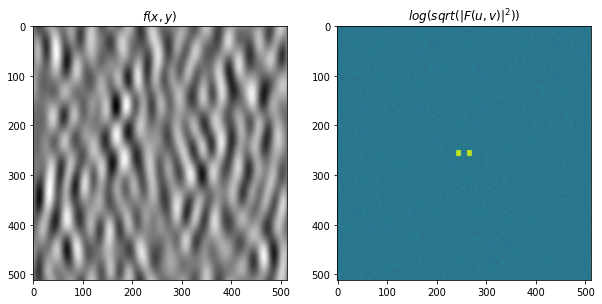

In [39]:
f2 = f.copy()
f2[250:262,262:272] *= 1000
f2[250:262,240:250] *= 1000
amplitude = np.sqrt(np.real(f2)**2+np.imag(f2)**2)
im2 = ifft2(ifftshift(f2)).real

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im2,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

Now we could also decide to mask the central region, which would remove the peaks that we just created and put all those values at zero. The image will once again look random:

<ipython-input-40-1da9c1ff754f>:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum


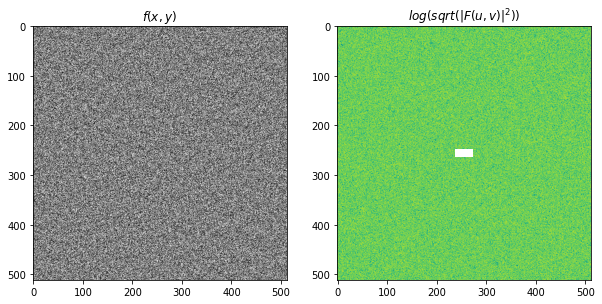

In [40]:
f3 = f2.copy()
f3[250:262,240:272] = 0
amplitude = np.sqrt(np.real(f3)**2+np.imag(f3)**2)
im3 = ifft2(ifftshift(f3)).real

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im3,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

Starting from those examples and the code below:

1. Use the Fourier transform to reduce the [dithering](https://en.wikipedia.org/wiki/Dither) of the *moire.png* image by building a low-pass filter.
1. Build a high-pass filter using Fourier transform and apply the filter to the "walking" image.

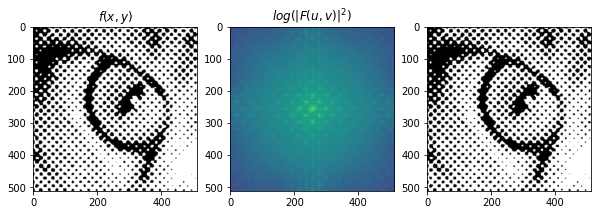

In [41]:
im = imread('moire1.png').astype(np.float)
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)
f2 = ifft2(ifftshift(f))

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,3,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.subplot(1, 3, 3)
plt.imshow(f2.real, cmap=plt.cm.gray)
plt.show()

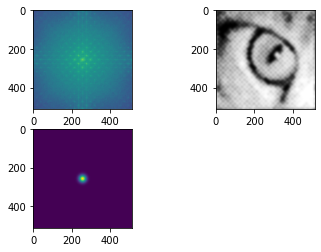

In [42]:

## -- Your code here -- ##
def makeGaussian(size, fwhm = 3, center=None):
    """ 
    Make a square gaussian kernel.
    Size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

image_f = fftshift(fft2(im))
amplitude = np.sqrt(np.real(image_f) ** 2 + np.imag(f) ** 2)

filter = makeGaussian(image_f.shape[0], 30)
# filter = 1 - filter  # Inverting the filter

image_f *= filter

image_if = ifft2(ifftshift(image_f))

plt.subplot(221)
plt.imshow(np.log(amplitude))
plt.subplot(222)
plt.imshow(image_if.real, cmap=plt.cm.gray)
plt.subplot(223)
plt.imshow(filter)
plt.show()


## 4. Morphological operations

* For morphology functions, [see the skimage documentation](http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

Starting from the example below:

1. Using the "opening" operation with a disk structuring element of increasing size, determine how many circles of any given radius there are in the *circles.png* image.
1. Build a morphological filter that eliminates one size of circles.

ValueError: dtype cannot be bool.

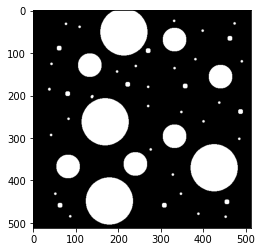

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
import skimage.filters.rank as skr
from skimage.morphology import disk

ima = imread('circles1.png')==0 #to be sure objects are = 1
plt.imshow(ima,cmap=plt.cm.gray);

# use the local maximum and local minimum for dilation and erosion
eroded_image = skr.minimum(ima,disk(5))
dilated_image = skr.maximum(ima,disk(5))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation');

## 5. Edge detection

Using the [convolve2d](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.convolve2d.html) function, develop the Sobel filter. 
The Sobel operator is given by
$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$
where $G_x$ and $G_y$ are images respectively obtained by a convolution with the given kernels
$$\mathbf{g}_y = \begin{bmatrix} 
    -1 & -2 & -1  \\
    0 & 0 & 0 \\
    +1 & +2 & +1 
    \end{bmatrix}
    \quad
    \mbox{and}
    \quad   
    \mathbf{g}_x = \begin{bmatrix} 
    -1 & 0 & +1 \\
    -2 & 0 & +2 \\
    -1 & 0 & +1 
    \end{bmatrix}
    $$

**Apply the Sobel filter** to find the edges in the "road" image.

Compare with the results of the **Canny edge filter** with different "sigma" values (see [the skimage documentation](http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html))

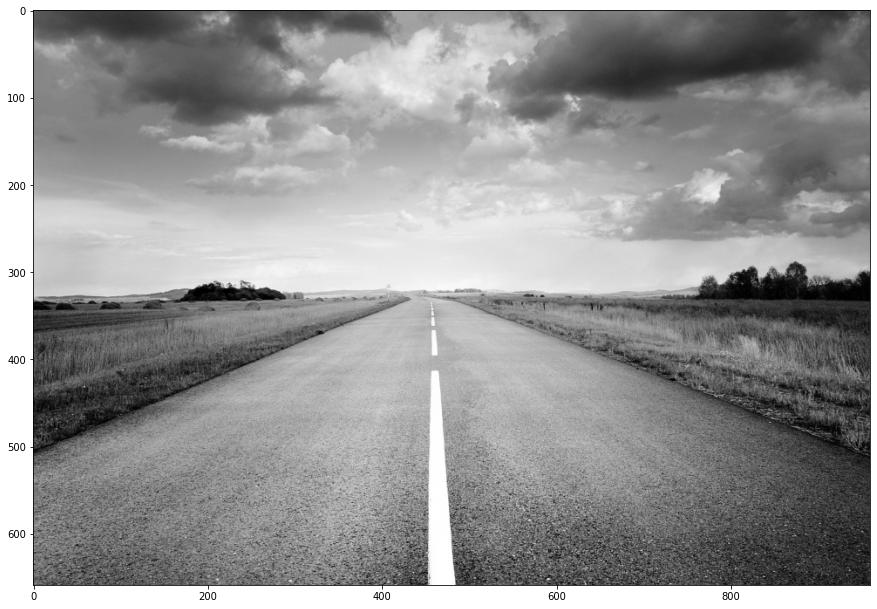

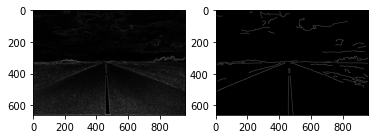

In [52]:
from skimage.data import camera
from skimage.io import imread
from skimage.feature import canny

im = imread('road.jpg', as_gray=True)

plt.figure(figsize=(15,15))
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

## -- Your code here -- ##

# kernels
g_x = np.asarray([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
g_y = np.transpose(g_x, (1, 0))

x_conv = convolve2d(im, g_x)
y_conv = convolve2d(im, g_y)

sobel = np.sqrt(x_conv ** 2 + y_conv ** 2)

# canny first proceeds with a gaussian kernel to reduce the noise of the image. The sigma factor reduces that noise.
# also, canny selects gradient zones with a threshold and draws a 1px line over that zone
canny_im = canny(im, sigma=3)

plt.subplot(121)
plt.imshow(sobel, cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(canny_im, cmap=plt.cm.gray)
plt.show()


Use the **[Hough transform](http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html)** to find the main straight lines in the road image, using the results from the Canny edge detector.

In [56]:

## -- Your code here -- ##



# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="./etretat.jpg" width="250px" />
<img src="./ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...